In [1]:
#step 1 : Import Modules
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#step 2 : Import Dataset
df = pd.read_csv("C:\\Users\\zeesh\\Desktop\\UniversityData\\Statistical-ML\\Project\\train.csv")

In [3]:
#step 3 : Viewing the data
df.head()

,Total words,Number words male,Number words female,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,6394,2631,1512,2251,343,2,1995,5,142,51.500000,42.333333,46,65,Female
1,8780,5236,1524,2020,1219,9,2001,4,37,39.125000,29.333333,58,34,Male
2,4176,3079,155,942,787,7,1968,1,376,42.500000,37.000000,46,37,Male
3,9855,5342,1073,3440,2623,12,2002,2,19,35.222222,21.500000,33,23,Male
4,7688,2536,1317,3835,3149,8,1988,4,40,45.250000,45.000000,36,39,Male


# <h2>Explanation of data <h2>

Year : That the film was released.<br> 
Number of female actors : With major speaking roles.<br> 
Number of male actors : With major speaking roles.<br> 
Gross : Profits made by film.<br> 
Total words : Total number of words spoken in the film.<br> 
Number of words male : Number of words spoken by all other male actors in the film (excluding lead if lead is male)<br> 
Number of words female : Number of words spoken by all other female actors in the film (excluding lead if lead is female)<br> 
Number of words lead : Number of words spoken by lead.<br> 
Difference in words lead and co-lead : Difference in number of words by lead and the actor of opposite gender who speaks most.<br> 
Lead Age : Age of lead actor.<br> 
Co-lead Age : Age of co-lead actor.<br> 
Mean Age Male : Mean age of all male characters.<br> 
Mean Age Female : Mean age of all female characters.<br> 

## Data Analysis 


### Visually Analysisng the data using Seaborn

#### Check how many MALE and Female are there using countplot method


<AxesSubplot:xlabel='Lead', ylabel='count'>

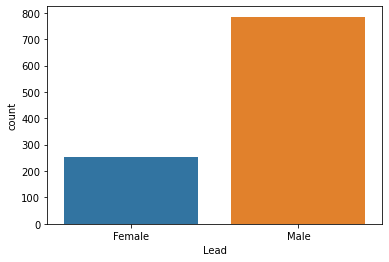

In [4]:
sns.countplot(x='Lead', data = df)

#### Checking for null values in the dataset

In [5]:
df.isna().sum()

Total words                             0
Number words male                       0
Number words female                     0
Number of words lead                    0
Difference in words lead and co-lead    0
Number of male actors                   0
Year                                    0
Number of female actors                 0
Gross                                   0
Mean Age Male                           0
Mean Age Female                         0
Age Lead                                0
Age Co-Lead                             0
Lead                                    0
dtype: int64

##### Visualizing the null values in the dataset

<AxesSubplot:>

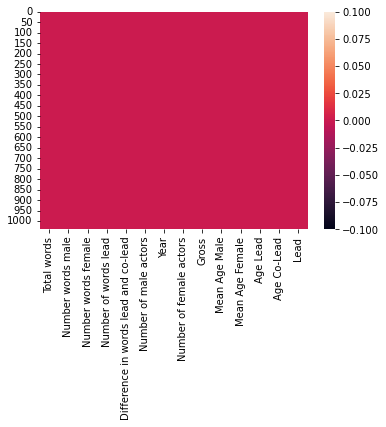

In [6]:
sns.heatmap(df.isna())

In [7]:
 #data of age of leads where Lead is Male
df_Male = df.where(df['Lead'] == 'Male')
df_M=df_Male.dropna(how='all')

#data of age of leads where Lead is Female
df_Female = df.where(df['Lead'] == 'Female')
df_F=df_Female.dropna(how='all')

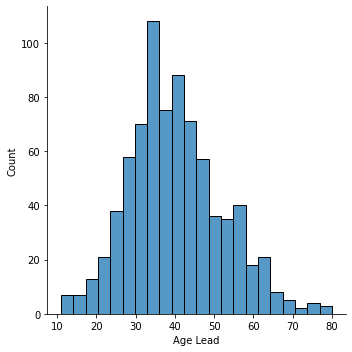

In [8]:
#find the distribution of age where Lead is Male
sns.displot(x='Age Lead', data= df_M)

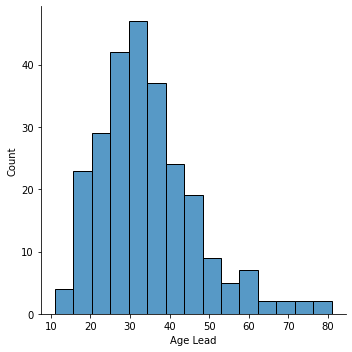

In [9]:
#find the distribution of age where Lead is Female
sns.displot(x='Age Lead', data= df_F)

# Preparing data for model

In [10]:
#Convert Lead gender coloumn to Numerical values
pd.get_dummies(df['Lead'])

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1034,0,1
1035,1,0
1036,0,1
1037,1,0


In [11]:
Gender_B = pd.get_dummies(df['Lead'], drop_first=True)

In [12]:
df['Gender_B'] = Gender_B

In [13]:
df.head()

,Total words,Number words male,Number words female,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead,Gender_B
0,6394,2631,1512,2251,343,2,1995,5,142,51.500000,42.333333,46,65,Female,0
1,8780,5236,1524,2020,1219,9,2001,4,37,39.125000,29.333333,58,34,Male,1
2,4176,3079,155,942,787,7,1968,1,376,42.500000,37.000000,46,37,Male,1
3,9855,5342,1073,3440,2623,12,2002,2,19,35.222222,21.500000,33,23,Male,1
4,7688,2536,1317,3835,3149,8,1988,4,40,45.250000,45.000000,36,39,Male,1


In [14]:
# drop column which are not required for the model
df.drop(['Year','Gross','Age Co-Lead'],axis=1,inplace=True)

In [15]:
df.head()

,Total words,Number words male,Number words female,Number of words lead,Difference in words lead and co-lead,Number of male actors,Number of female actors,Mean Age Male,Mean Age Female,Age Lead,Lead,Gender_B
0,6394,2631,1512,2251,343,2,5,51.500000,42.333333,46,Female,0
1,8780,5236,1524,2020,1219,9,4,39.125000,29.333333,58,Male,1
2,4176,3079,155,942,787,7,1,42.500000,37.000000,46,Male,1
3,9855,5342,1073,3440,2623,12,2,35.222222,21.500000,33,Male,1
4,7688,2536,1317,3835,3149,8,4,45.250000,45.000000,36,Male,1


In [16]:
#Seperate dependent and dependent variable 
#dependent variable
x = df[['Total words','Number words male','Number words female','Number of words lead','Difference in words lead and co-lead','Number of male actors','Number of female actors','Mean Age Male','Mean Age Female','Age Lead']]
#dependent variable
y = df['Gender_B']

In [17]:
y

0       0
1       1
2       1
3       1
4       1
       ..
1034    1
1035    0
1036    1
1037    0
1038    1
Name: Gender_B, Length: 1039, dtype: uint8

# Data Modeling

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#train test split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.33, random_state=42)

In [20]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [21]:
#Fit Logistic Regression
lr = LogisticRegression()

In [22]:
lr.fit(x_train, y_train)

C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#check accuracy
print(f'Train Accuracy = {lr.score(x_train, y_train):.3f}')
print(f'Test Accuracy = {lr.score(x_test, y_test):.3f}')

Train Accuracy = 0.859
Test Accuracy = 0.840


In [24]:
#predict
predict = lr.predict(x_test)

In [25]:
#Probabiltiy for +tive outcome is kept
lr_prob = lr.predict_proba(x_test)[:,1]

In [26]:
# Complete AREA UNDER THE ROC CURVE values
from sklearn.metrics import roc_curve, roc_auc_score
lr_auc = roc_auc_score(y_test, lr_prob)

In [27]:
#Display the AREA UNDER THE ROC CURVE score
print("Logistic Regression : AUROC = %.3f" %(lr_auc))

Logistic Regression : AUROC = 0.870


In [28]:
#Calculate AREA UNDER THE ROC CURVE score
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)

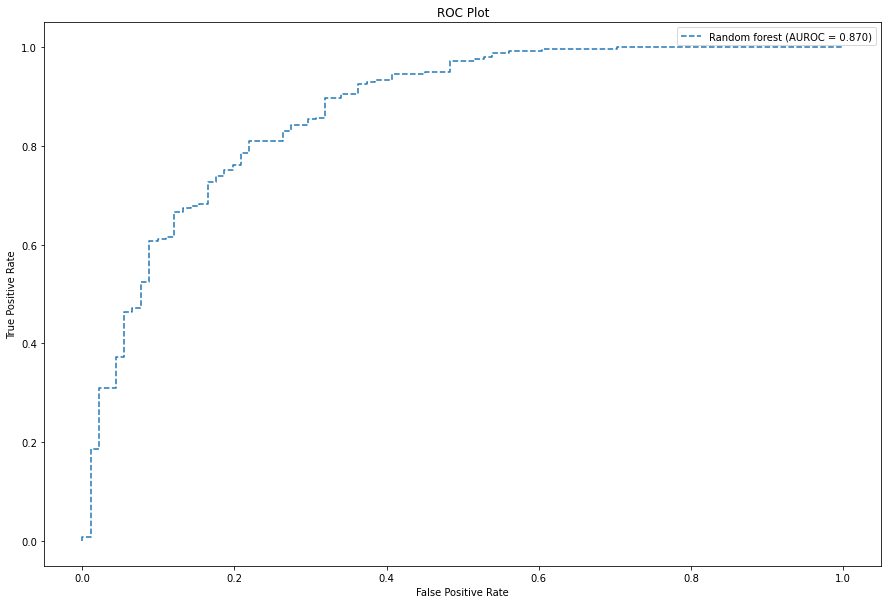

In [29]:
#plot the curve
plt.figure(figsize = (15,10))
plt.plot(lr_fpr, lr_tpr, linestyle = '--', label = 'Random forest (AUROC = %0.3f)' %lr_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

## Testing

In [30]:
#print Confusion Matrix to see how well your model works
from sklearn.metrics import confusion_matrix

In [31]:
pd.DataFrame(confusion_matrix(y_test,predict),  columns = ['Predicted No', 'Predicted Yes'], index=['Actual No','Actual Yes']) 

,Predicted No,Predicted Yes
Actual No,47,44
Actual Yes,11,241


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        91
           1       0.85      0.96      0.90       252

    accuracy                           0.84       343
   macro avg       0.83      0.74      0.76       343
weighted avg       0.84      0.84      0.83       343



#### Tunning the method using hyperparameter regression

In [33]:
logModel = LogisticRegression()

In [34]:
param_grid = [
    {'penalty' : ['l1','l2','elasticnet','none'],
     'C,' : np.logspace(-4, 4, 20),
     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'max_iter' : [100, 1000, 2500, 5000]
        
    }
]

In [35]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid , cv = 3, verbose = True, n_jobs = -1)

In [44]:
best_clf = clf.fit(x,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

In [37]:
best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, max_iter=1000, solver='newton-cg')

In [38]:
#check accuracy
print(f'Accuracy = {best_clf.score(x,y):.3f}')

Accuracy = 0.879


# K Fold Cross Validation

In [39]:
from sklearn.model_selection import KFold
model = LogisticRegression()
kfold_validation = KFold(10)

In [40]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(model, x, y, cv = kfold_validation)
print(result)
print(np.mean(result))

C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.83653846 0.93269231 0.875      0.875      0.86538462 0.85576923
 0.86538462 0.79807692 0.82692308 0.75728155]
0.8488050784167289


C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

## Repeated Random Test-Train Splits

In [41]:
from sklearn.model_selection import ShuffleSplit
model = LogisticRegression()
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.30)
results = cross_val_score(model, x, y, cv=ssplit)

C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zeesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [42]:
#results
print(f'Results - {results}')

Results - [0.86538462 0.83012821 0.88782051 0.85576923 0.88141026 0.85897436
 0.84294872 0.87820513 0.84935897 0.84615385]


In [43]:
#np.mean(results)
print(f'Mean Result - {np.mean(results):.5f}')

Mean Result - 0.85962
